<a href="https://colab.research.google.com/github/israilla/FIAP/blob/main/Modelo01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from pycaret.regression import *

df = pd.read_csv("https://raw.githubusercontent.com/diogenesjusto/FIAP/master/SHIFT/desafio/baba/BABA.csv", )

In [ ]:
!pip install pycaret

In [ ]:
treino = df.iloc[0:365,]
predict = df.iloc[365:396,]

predict['venda'] = 0

# dummy_mes = pd.get_dummies(treino[["mes", "weekday"]])

# treino = pd.concat([treino, dummy_mes], axis= 1)

predict

,Unnamed: 0,X,date,mes,weekday,margem,venda,desconto,outdesc,outmg
365,366,366,20150801,agosto,sabado,0.433052,0,3315.192880,0,0
366,367,367,20150802,agosto,domingo,0.437401,0,3631.240000,0,0
367,368,368,20150803,agosto,segunda-feira,0.416075,0,3753.040004,0,0
368,369,369,20150804,agosto,terca-feira,0.385379,0,2523.500013,0,0
369,370,370,20150805,agosto,quarta-feira,0.389125,0,5285.936265,0,0
370,371,371,20150806,agosto,quinta-feira,0.371438,0,4415.980000,0,0
371,372,372,20150807,agosto,sexta-feira,0.418109,0,3803.310997,0,0
372,373,373,20150808,agosto,sabado,0.372597,0,1764.178118,0,0
373,374,374,20150809,agosto,domingo,0.415690,0,1712.850000,0,0
374,375,375,20150810,agosto,segunda-feira,0.422504,0,4604.669365,0,0


# Nova seção

# Nova seção

<AxesSubplot: xlabel='desconto', ylabel='venda'>

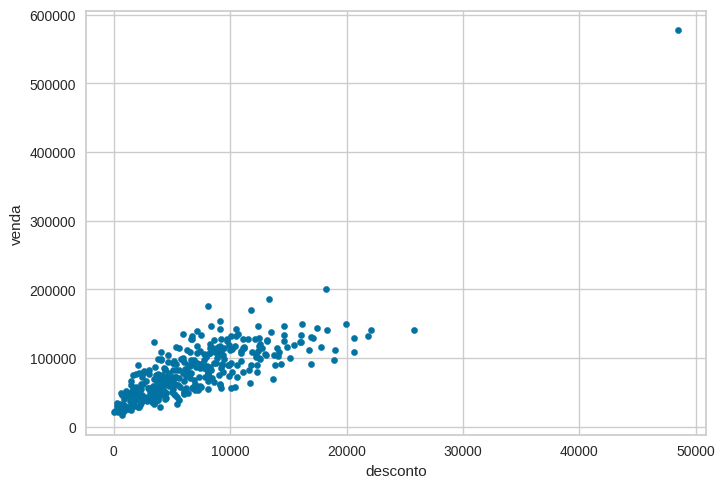

In [ ]:
df.plot.scatter(x="desconto", y="venda")

In [81]:
teste = treino.iloc[0:277]
treino2 = treino.iloc[277:365]

s = setup(data = treino2, test_data = teste, target = 'venda',  transform_target = False)

,Description,Value
0,Session id,7609
1,Target,venda
2,Target type,Regression
3,Original data shape,"(365, 10)"
4,Transformed data shape,"(365, 18)"
5,Transformed train set shape,"(88, 18)"
6,Transformed test set shape,"(277, 18)"
7,Numeric features,7
8,Categorical features,2
9,Preprocess,True


In [82]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Ridge Regression,839935.9739,1256125314465.2781,1120769.9650,-655.1038,2.1786,10.2842


In [83]:
best = compare_models()


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,10646.4077,221115194.7559,13807.0848,0.3840,0.2492,0.2074,0.0830
lasso,Lasso Regression,10746.6391,225727973.2178,14067.7292,0.3475,0.2534,0.2083,0.0830
lr,Linear Regression,10747.3868,225791694.8112,14071.6972,0.3473,0.2535,0.2084,0.1170
llar,Lasso Least Angle Regression,11531.5890,237876300.6554,14516.0829,0.3010,0.2758,0.2380,0.0810
en,Elastic Net,12025.3113,271448892.8739,15325.1989,0.2519,0.2970,0.2543,0.0840
ada,AdaBoost Regressor,12353.3808,267819868.4766,15336.7385,0.1547,0.2867,0.2634,0.1440
gbr,Gradient Boosting Regressor,11221.3865,279183976.8000,15532.3992,0.1431,0.2670,0.2101,0.1240
rf,Random Forest Regressor,11896.7990,281436418.7339,15530.7171,0.1322,0.2724,0.2311,0.2520
omp,Orthogonal Matching Pursuit,13321.6796,304141544.2388,16423.6448,0.1237,0.3228,0.2906,0.0790
br,Bayesian Ridge,13139.3614,309110844.7405,16499.9929,0.1208,0.3241,0.2857,0.0810


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [84]:
print(best)

Ridge(random_state=7609)


In [ ]:
y_treino = treino['venda']
x_treino = treino[['outmg']]
x_predict = predict[['outmg']]

In [85]:
predictions = predict_model(final_best, data=predict.drop(["venda"], axis=1))
predictions = predictions.rename(columns={'prediction_label': 'venda'})
pd.DataFrame(predictions[["venda"]]).to_csv('predict.csv')
files.download('predict.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>